In [1]:
import mne
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
import os

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

In [5]:
mne.set_log_level('ERROR')

# Read Data

1. read all data sets (epochs)
2. tfr morlet wavlets (gaussian curve multiplied by sine curve)
3. average over trials

resulting data:

- power estimates: 28 ch * 36 freq * 201 samples
- inter trial coherence (same)
- filtered 0.1-30 Hz

In [72]:
epochs = os.listdir("../09_PreparationEEG/epochs_MovingWindowPeakToPeak/")
epochs.remove('BHC19K1-epo.fif')

In [7]:
all_power_ep_mean = []
all_itc_ep_mean =[]

In [35]:
frequencies = np.arange(3, 31, 1)
n_cycles=frequencies / 2.
decim=1

for i,eppath in enumerate(epochs):
    ep = mne.read_epochs("../09_PreparationEEG/epochs_MovingWindowPeakToPeak/"+eppath)
    ep = ep.crop(tmin=0)
    power_ep_mean, itc = mne.time_frequency.tfr_morlet(ep,n_cycles=n_cycles,
                                          freqs=frequencies, 
                                          decim=decim, 
                                          return_itc=True, n_jobs=-1, average=True)
    all_power_ep_mean.insert(i,power_ep_mean)
    all_itc_ep_mean.insert(i,itc)
    

In [36]:
np_all_power_ep_mean = np.array([x.data for x in all_power_ep_mean])

np_all_itc_ep_mean = np.array([x.data for x in all_itc_ep_mean])

In [7]:
ch_names= ep.ch_names[:28]

NameError: name 'ep' is not defined

# Mean, Median, Maximum, 95 % percentile across time

Max power per channel, freq and trial, then mean over all trials per participant

## Read and transform data

In [6]:
epochs = os.listdir("../09_PreparationEEG/epochs_MovingWindowPeakToPeak/")
epochs.remove('BHC19K1-epo.fif')

In [7]:
frequencies = np.arange(3, 31, 1)
n_cycles=frequencies / 2.
decim=1


In [8]:
import time

In [9]:
all_power_ep_max_mean= []
for i,eppath in enumerate(epochs):
    print(i,eppath)
    start= time.time()
    ep = mne.read_epochs("../09_PreparationEEG/epochs_MovingWindowPeakToPeak/"+eppath)
    ep = ep.crop(tmin=0)
    print("start TFR", str(time.time()-start))
    power_ep  = mne.time_frequency.tfr_morlet(ep,n_cycles=n_cycles,
                                          freqs=frequencies, 
                                          decim=decim, 
                                          return_itc=False, n_jobs=-1, average=False)
    print("Start aggregtate", str(time.time()-start))
    mean_max_power = power_ep.data.max(axis=3).mean(axis=0) # max over time, mean over trials

    all_power_ep_max_mean.insert(i,mean_max_power)
    end= time.time()

    print(end-start)
    print(" ")
    

0 AAR23B1-epo.fif
start TFR 0.14800143241882324
Start aggregtate 5.178083896636963
5.215088129043579
 
1 ACE11B1-epo.fif
start TFR 0.16799569129943848
Start aggregtate 2.8385674953460693
2.8705849647521973
 
2 ADD25P1-epo.fif
start TFR 0.16299891471862793
Start aggregtate 2.409687042236328
2.437697410583496
 
3 AGI16S-epo.fif
start TFR 0.16898393630981445
Start aggregtate 2.6591744422912598
2.6921863555908203
 
4 AHR27N1-epo.fif
start TFR 0.1899886131286621
Start aggregtate 2.7309024333953857
2.7648987770080566
 
5 AIV25B1-epo.fif
start TFR 0.1759951114654541
Start aggregtate 2.6011404991149902
2.6331517696380615
 
6 AJH13B1-epo.fif
start TFR 0.16299772262573242
Start aggregtate 2.3384714126586914
2.3674824237823486
 
7 AJL30S1-epo.fif
start TFR 0.16499829292297363
Start aggregtate 2.4950287342071533
2.5260400772094727
 
8 AKK31B1-epo.fif
start TFR 0.1729886531829834
Start aggregtate 2.5934762954711914
2.6254875659942627
 
9 ARL17K1-epo.fif
start TFR 0.17598891258239746
Start aggregtat

Start aggregtate 2.884995460510254
2.9210052490234375
 
79 SBL15H-epo.fif
start TFR 0.1949906349182129
Start aggregtate 2.7797300815582275
2.81374454498291
 
80 SHT02N1-epo.fif
start TFR 0.19698143005371094
Start aggregtate 2.7272145748138428
2.761218547821045
 
81 SJA02B1-epo.fif
start TFR 0.18499302864074707
Start aggregtate 2.820870876312256
2.853886604309082
 
82 SJN01B1-epo.fif
start TFR 0.17698001861572266
Start aggregtate 2.484848976135254
2.5158655643463135
 
83 SJO18S1-epo.fif
start TFR 0.16498279571533203
Start aggregtate 2.1483771800994873
2.1753950119018555
 
84 SKB08F1-epo.fif
start TFR 0.18798136711120605
Start aggregtate 2.8408122062683105
2.874817132949829
 
85 SMS30P1-epo.fif
start TFR 0.18699121475219727
Start aggregtate 2.710951328277588
2.7439637184143066
 
86 THV03F1-epo.fif
start TFR 0.1849842071533203
Start aggregtate 2.9030163288116455
2.9360334873199463
 
87 TSL14D1-epo.fif
start TFR 0.17999815940856934
Start aggregtate 2.709364652633667
2.7433736324310303
 
88

In [10]:
ch_names = power_ep.ch_names

In [11]:
all_power_ep_max_mean = np.array(all_power_ep_max_mean)

In [12]:
all_power_ep_max_mean.shape

(95, 28, 28)

In [16]:
power_ep  = mne.time_frequency.tfr_morlet(ep,n_cycles=[1,1.5],
                                          freqs=[2,3], 
                                          decim=1, 
                                          return_itc=False, n_jobs=-1, average=False)

In [18]:
power_ep.data.shape

(199, 28, 2, 201)

In [24]:
x = np.array([[[1,2,3],[4,5,6]],[[1,2,3],[4,5,6]],[[1,2,3],[4,5,6]],[[1,2,3],[4,5,6]]])

In [32]:
["meanMaxPower_"+a+"_"+str(b)+"Hz" for (a,b) in itertools.product(ch_names, frequencies )]

['meanMaxPower_Fp1_3Hz',
 'meanMaxPower_Fp1_4Hz',
 'meanMaxPower_Fp1_5Hz',
 'meanMaxPower_Fp1_6Hz',
 'meanMaxPower_Fp1_7Hz',
 'meanMaxPower_Fp1_8Hz',
 'meanMaxPower_Fp1_9Hz',
 'meanMaxPower_Fp1_10Hz',
 'meanMaxPower_Fp1_11Hz',
 'meanMaxPower_Fp1_12Hz',
 'meanMaxPower_Fp1_13Hz',
 'meanMaxPower_Fp1_14Hz',
 'meanMaxPower_Fp1_15Hz',
 'meanMaxPower_Fp1_16Hz',
 'meanMaxPower_Fp1_17Hz',
 'meanMaxPower_Fp1_18Hz',
 'meanMaxPower_Fp1_19Hz',
 'meanMaxPower_Fp1_20Hz',
 'meanMaxPower_Fp1_21Hz',
 'meanMaxPower_Fp1_22Hz',
 'meanMaxPower_Fp1_23Hz',
 'meanMaxPower_Fp1_24Hz',
 'meanMaxPower_Fp1_25Hz',
 'meanMaxPower_Fp1_26Hz',
 'meanMaxPower_Fp1_27Hz',
 'meanMaxPower_Fp1_28Hz',
 'meanMaxPower_Fp1_29Hz',
 'meanMaxPower_Fp1_30Hz',
 'meanMaxPower_Fp2_3Hz',
 'meanMaxPower_Fp2_4Hz',
 'meanMaxPower_Fp2_5Hz',
 'meanMaxPower_Fp2_6Hz',
 'meanMaxPower_Fp2_7Hz',
 'meanMaxPower_Fp2_8Hz',
 'meanMaxPower_Fp2_9Hz',
 'meanMaxPower_Fp2_10Hz',
 'meanMaxPower_Fp2_11Hz',
 'meanMaxPower_Fp2_12Hz',
 'meanMaxPower_Fp2_13Hz',


In [35]:
feats_meanMaxPower = pd.DataFrame(data=all_power_ep_max_mean.reshape([95,-1]),
             columns=["meanMaxPower_"+a+"_"+str(b)+"Hz" for (a,b) in itertools.product(ch_names, frequencies )],
             index=[ep.split("-")[0] for ep in epochs])

In [39]:
feats_meanMaxPower.to_csv("featsEpochs_MeanMaxPower.csv",sep="\t")


__create features and save them__

In [78]:
labels = pd.read_csv("../07_Feature_Preprocessing/label_data_complete.txt",
                     sep="\t", decimal=',').set_index("Subject_ID")
labels.loc["BDS23B"] = labels.loc["BDS23S"]
ep_ids = [ep[:-1] if ep.endswith("1")   else ep  for ep in [ep.split("-")[0] for ep in epochs]]
labels = labels.loc[ep_ids,:]
labels_ = labels.reset_index()
labels_["ImplizitesLernen_kont"] = 0-labels_["ImplizitesLernen_kont"]

## correlations and heatmap

In [79]:
all_power_ep_max_mean_wide = all_power_ep_max_mean.reshape([95,-1])

95 participants X 28 channels X 28 freqs matrix

absolut + correlation mit Impl/Ecpl

In [80]:
all_power_ep_max_mean_wide.shape

(95, 784)

In [100]:
corr_imp= pd.DataFrame(
    pd.DataFrame(all_power_ep_max_mean_wide).corrwith(labels_.ImplizitesLernen_kont).values.reshape([28,28]),
    index=ch_names,
    columns= np.arange(3, 31, 1)
)

In [101]:
corr_exp= pd.DataFrame(
    pd.DataFrame(all_power_ep_max_mean_wide).corrwith(labels_.ExplizitesLernen_kont).values.reshape([28,28]),
    index=ch_names,
    columns= np.arange(3, 31, 1))

I:\Miniconda\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


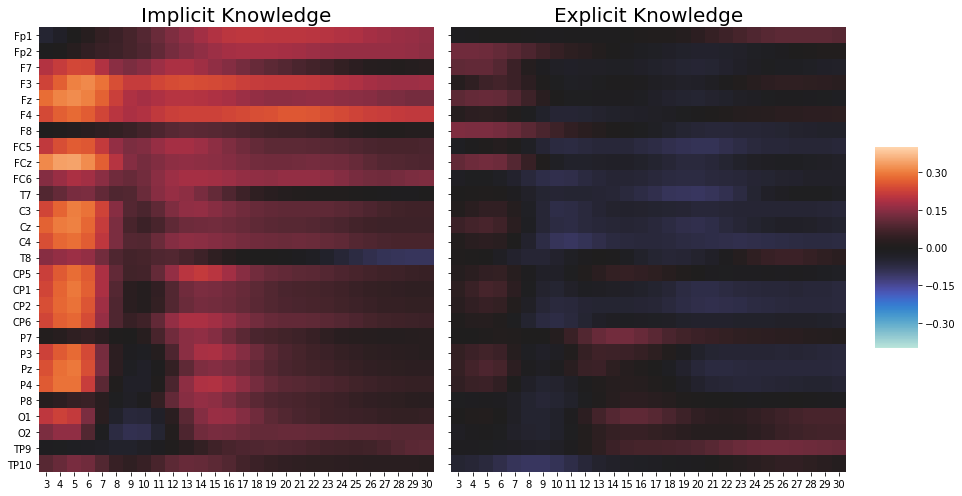

In [102]:
dfs = [corr_imp,corr_exp]

fig, axn = plt.subplots(1, 2, sharey=True,figsize=(20,7))
cbar_ax = fig.add_axes([.91, .3, .03, .4])

for i, ax in enumerate(axn.flat):
    x = sns.heatmap(dfs[i], ax=ax,
                    yticklabels=True,
                            center=0,vmin=-.4,vmax=.4,                              
                    
                cbar=i == 0,                
                cbar_ax=None if i else cbar_ax)


cols = ["Implicit Knowledge","Explicit Knowledge"]


for ax, col in zip(axn, cols):
    ax.set_title(col,size=20)

fig.tight_layout(rect=[0.3, 0, .9, 1])

# heatmaps for all 28 channels

In [15]:
def channelwisePlot(this_tensor):
    fig, axn = plt.subplots(4, 7, sharex=False, sharey=False,figsize=(24,16))

    cbar_ax = fig.add_axes([.91, .3, .03, .4])


    for i, ax in enumerate(axn.flat):
        df= pd.DataFrame(this_tensor[i,:,1:],index=frequencies,columns=np.arange(0,800,4))

        x = sns.heatmap(
            df, 
            ax=ax,

            yticklabels=True,
            xticklabels=25,
               
            
             
            cmap="viridis",
            
               cbar=i == 0,                
            cbar_ax=None if i else cbar_ax          
        )

        x.set_xticklabels(x.get_xticklabels(), rotation=90)
        ax.set_title(ch_names[i],size=14)
        ax.set_ylabel('')    
        ax.set_xlabel('')



    fig.tight_layout(rect=[0.3, 0, .9, 1])

In [16]:
def channelwisePlotCORR(this_tensor):
    fig, axn = plt.subplots(4, 7, sharex=False, sharey=False,figsize=(24,16))

    cbar_ax = fig.add_axes([.91, .3, .03, .4])


    for i, ax in enumerate(axn.flat):
        df= pd.DataFrame(this_tensor[i,:,1:],index=frequencies,columns=np.arange(0,800,4))

        x = sns.heatmap(
            df, 
            ax=ax,

            yticklabels=True,
            xticklabels=25,
                center=0,
            
            vmin=-.4,vmax=.4,    
            
            
               cbar=i == 0,                
            cbar_ax=None if i else cbar_ax          
        )

        x.set_xticklabels(x.get_xticklabels(), rotation=90)
        ax.set_title(ch_names[i],size=14)
        ax.set_ylabel('')    
        ax.set_xlabel('')



    fig.tight_layout(rect=[0.3, 0, .9, 1])

## power heatmap for one random trial of one random participant

In [45]:
epx = mne.read_epochs("../09_PreparationEEG/epochs_MovingWindowPeakToPeak/"+epochs[23])
epx = epx.crop(tmin=0)
power_epx_mean = mne.time_frequency.tfr_morlet(epx,n_cycles=n_cycles,
                                      freqs=frequencies, 
                                      decim=decim, 
                                      return_itc=False, n_jobs=-1, average=False)

In [46]:
power_epx_mean.data.shape

(236, 28, 28, 201)

In [58]:
this_tensor_singleTrial = power_epx_mean.data[23,:,:,:]

I:\Miniconda\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


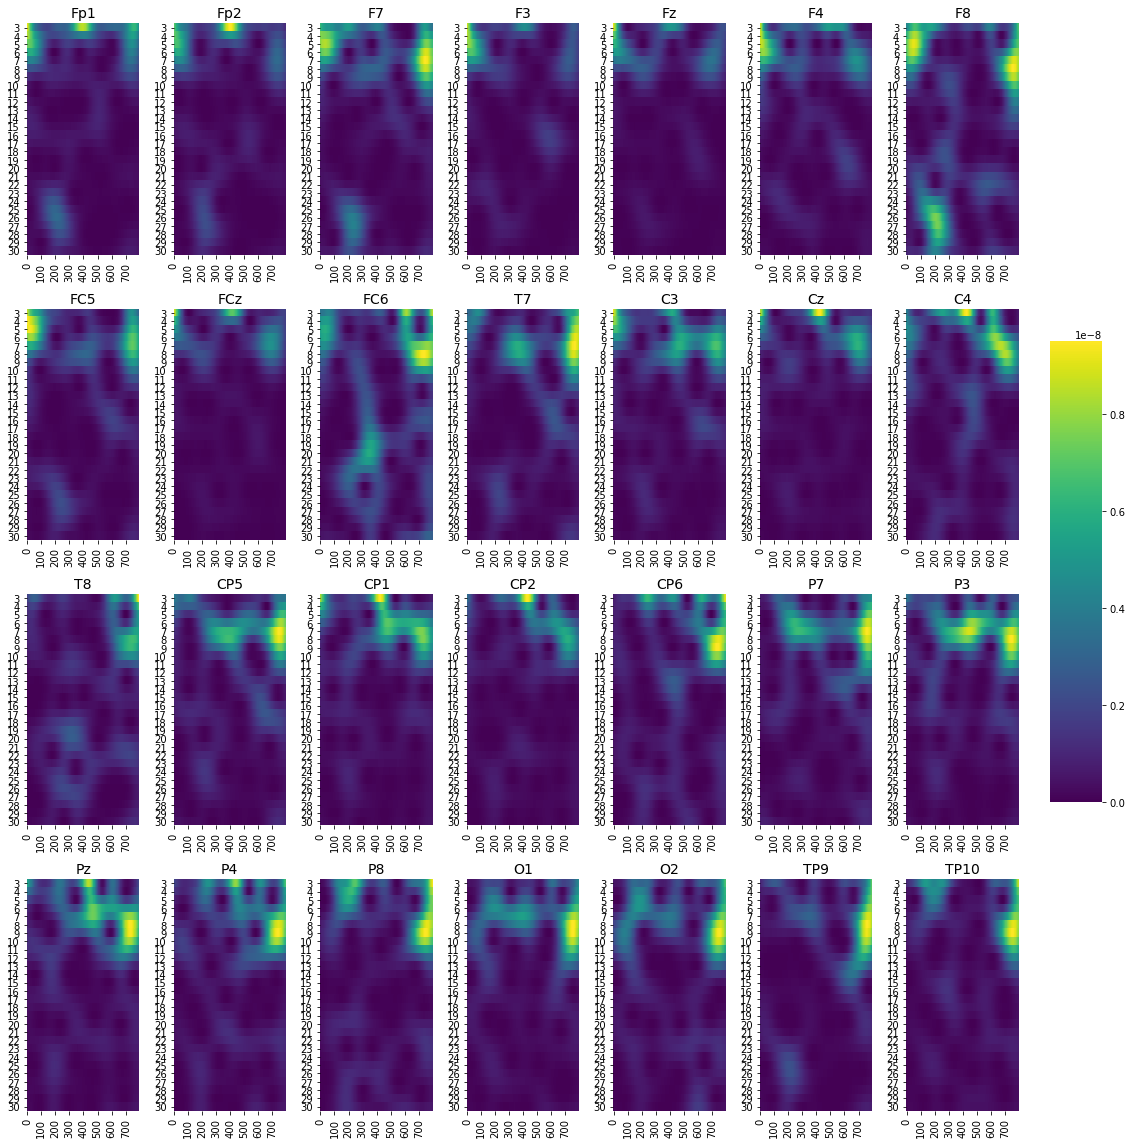

In [59]:
channelwisePlot(this_tensor_singleTrial)

In [33]:
np_all_power_ep_mean.shape

(96, 28, 36, 201)

## power heatmaps for one random participant

In [38]:
np_all_power_ep_mean.shape

(96, 28, 36, 201)

In [60]:
this_tensor_oneParticipant = np_all_power_ep_mean[23,:,:,:]

I:\Miniconda\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


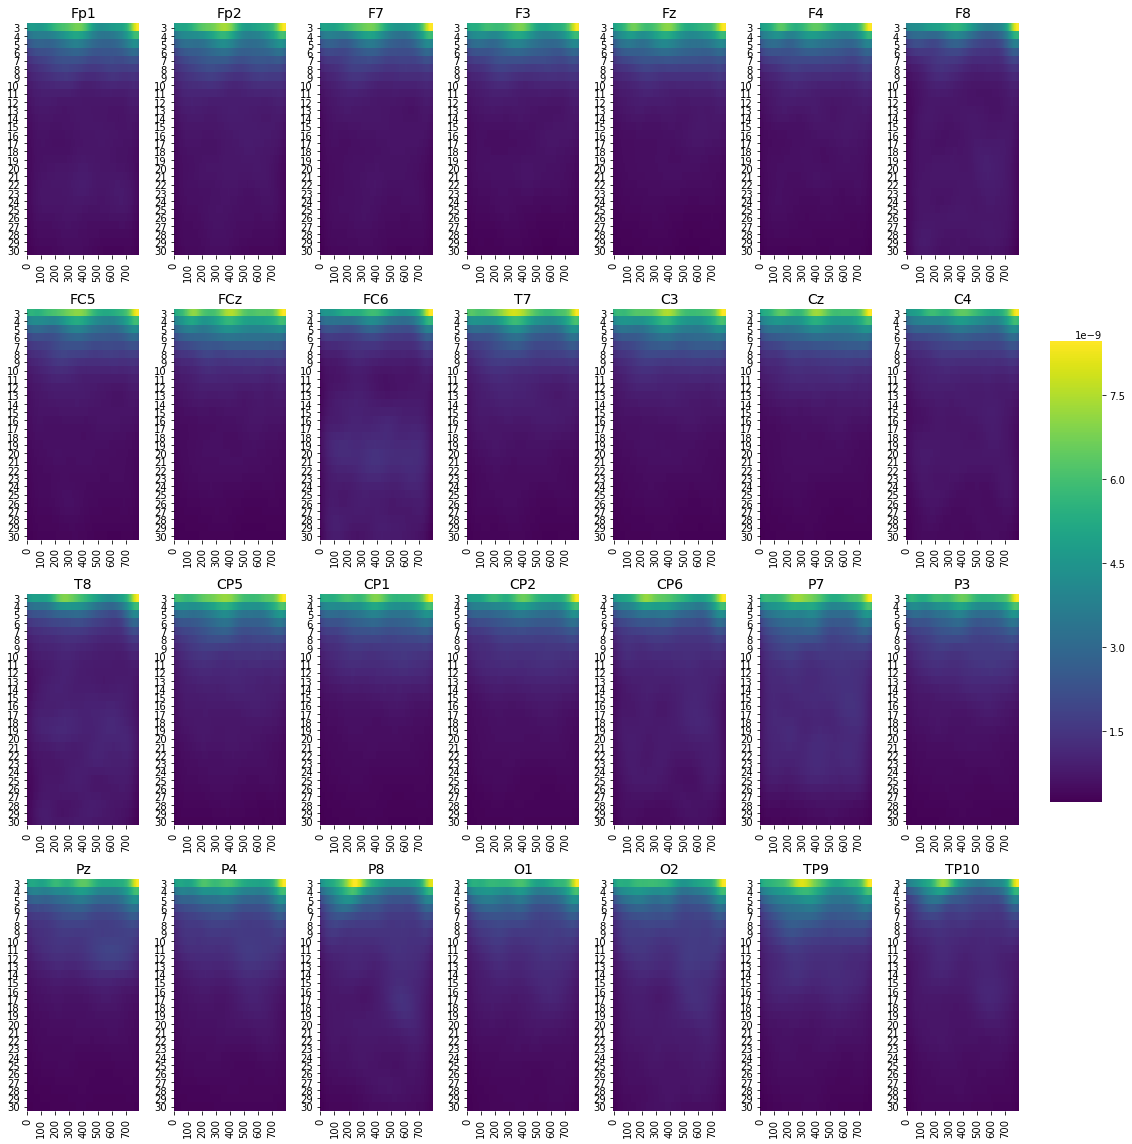

In [62]:
channelwisePlot(this_tensor_oneParticipant)

## over all participants

In [65]:
this_tensor_allparticpiantsPower = np_all_power_ep_mean.mean(axis=0)

I:\Miniconda\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


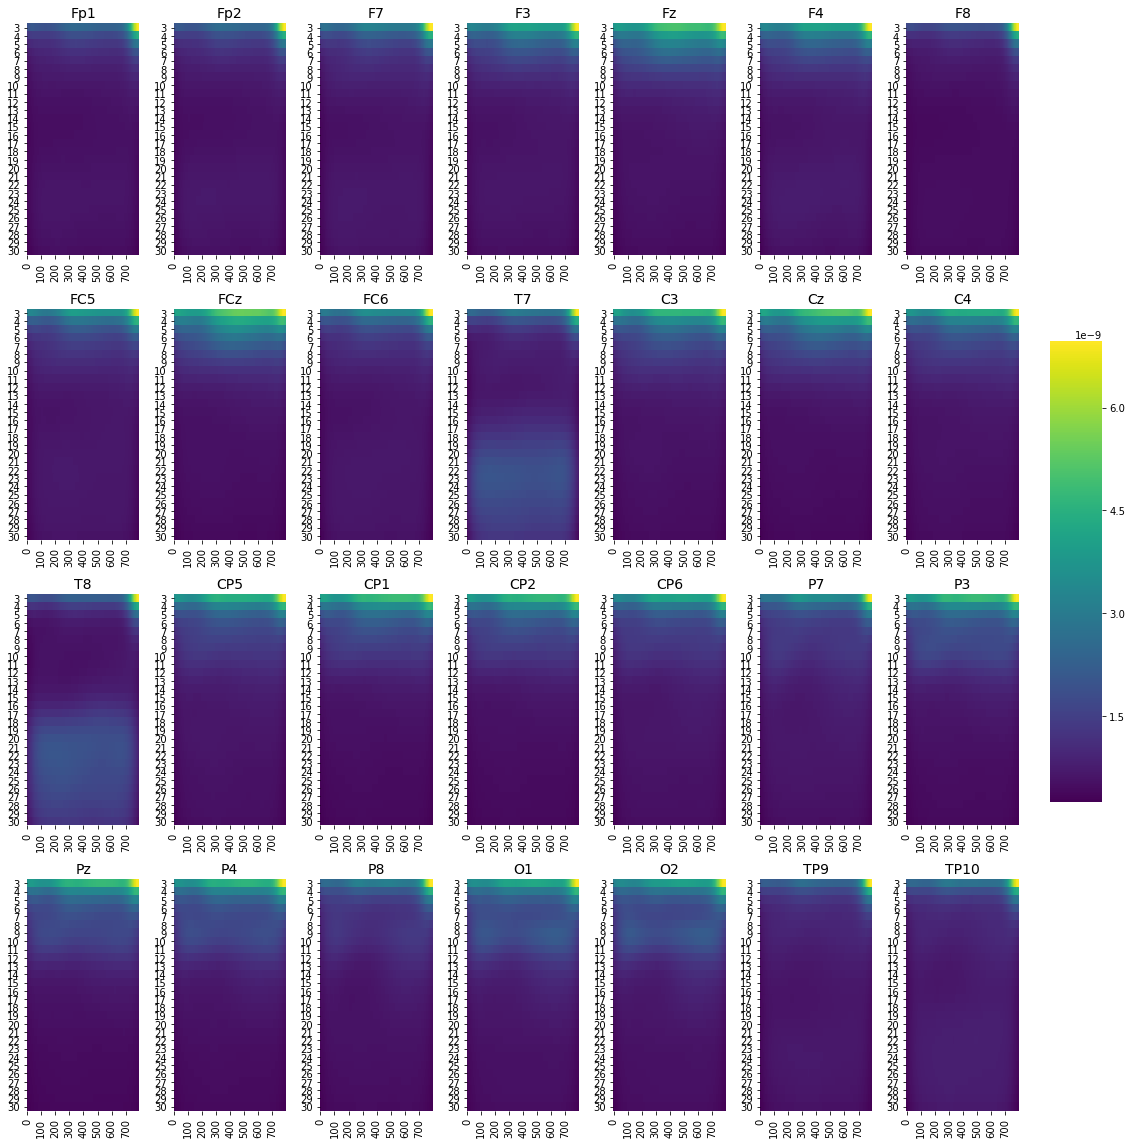

In [66]:
channelwisePlot(this_tensor_allparticpiantsPower)

# correlations between Labels and TF values

## read data in both featuresand targetsin same order

In [7]:
labels = pd.read_csv("../07_Feature_Preprocessing/label_data_complete.txt",
                     sep="\t", decimal=',').set_index("Subject_ID")
labels.loc["BDS23B"] = labels.loc["BDS23S"]

epochs = os.listdir("../09_PreparationEEG/epochs_MovingWindowPeakToPeak/")
epochs.remove('BHC19K1-epo.fif')

ep_ids = [ep[:-1] if ep.endswith("1")   else ep  for ep in [ep.split("-")[0] for ep in epochs]]

labels = labels.loc[ep_ids,:]
labels_ = labels.reset_index()
labels_["ImplizitesLernen_kont"] = 0-labels_["ImplizitesLernen_kont"]



In [8]:
all_power_ep_mean = []
all_itc_ep_mean =[]

frequencies = np.arange(3, 31, 1)
n_cycles=frequencies / 2.
decim=1

for i,eppath in enumerate(epochs):
    ep = mne.read_epochs("../09_PreparationEEG/epochs_MovingWindowPeakToPeak/"+eppath)
    ep = ep.crop(tmin=0)
    power_ep_mean, itc = mne.time_frequency.tfr_morlet(ep,n_cycles=n_cycles,
                                          freqs=frequencies, 
                                          decim=decim, 
                                          return_itc=True, n_jobs=-1, average=True)
    all_power_ep_mean.insert(i,power_ep_mean)
    all_itc_ep_mean.insert(i,itc)
    

np_all_power_ep_mean = np.array([x.data for x in all_power_ep_mean])

np_all_itc_ep_mean = np.array([x.data for x in all_itc_ep_mean])

In [9]:
np_all_itc_ep_mean.shape

(95, 28, 28, 201)

## correlation with heatmaps o

In [10]:
np_all_itc_ep_mean_wide = pd.DataFrame(np_all_itc_ep_mean.reshape([95,-1]))

np_all_power_ep_mean_wide = pd.DataFrame(np_all_power_ep_mean.reshape([95,-1]))




In [11]:
corr_imp_itc = np_all_itc_ep_mean_wide.corrwith(labels_.ImplizitesLernen_kont)
corr_exp_itc = np_all_itc_ep_mean_wide.corrwith(labels_.ExplizitesLernen_kont)

corr_imp_pow = np_all_power_ep_mean_wide.corrwith(labels_.ImplizitesLernen_kont)
corr_exp_pow = np_all_power_ep_mean_wide.corrwith(labels_.ExplizitesLernen_kont)


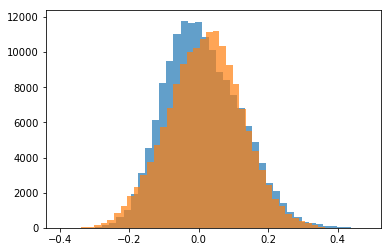

In [81]:
x = plt.hist(corr_imp_itc, bins=40,alpha=0.7)
z = plt.hist(corr_exp_itc, bins=40,alpha=0.7)

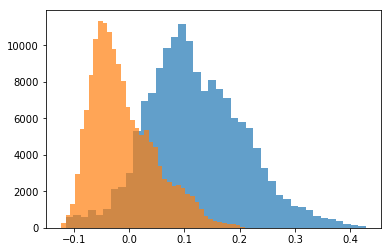

In [82]:
x = plt.hist(corr_imp_pow, bins=40,alpha=0.7)
z = plt.hist(corr_exp_pow, bins=40,alpha=0.7)

In [12]:
corr_imp_itc_compact = corr_imp_itc.values.reshape(( 28, 28, 201))
corr_exp_itc_compact = corr_exp_itc.values.reshape(( 28, 28, 201))

corr_imp_pow_compact = corr_imp_pow.values.reshape(( 28, 28, 201))
corr_exp_pow_compact = corr_exp_pow.values.reshape(( 28, 28, 201))



In [13]:
corr_exp_pow_compact.shape

(28, 28, 201)

In [19]:
ch_names = ep.ch_names

I:\Miniconda\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


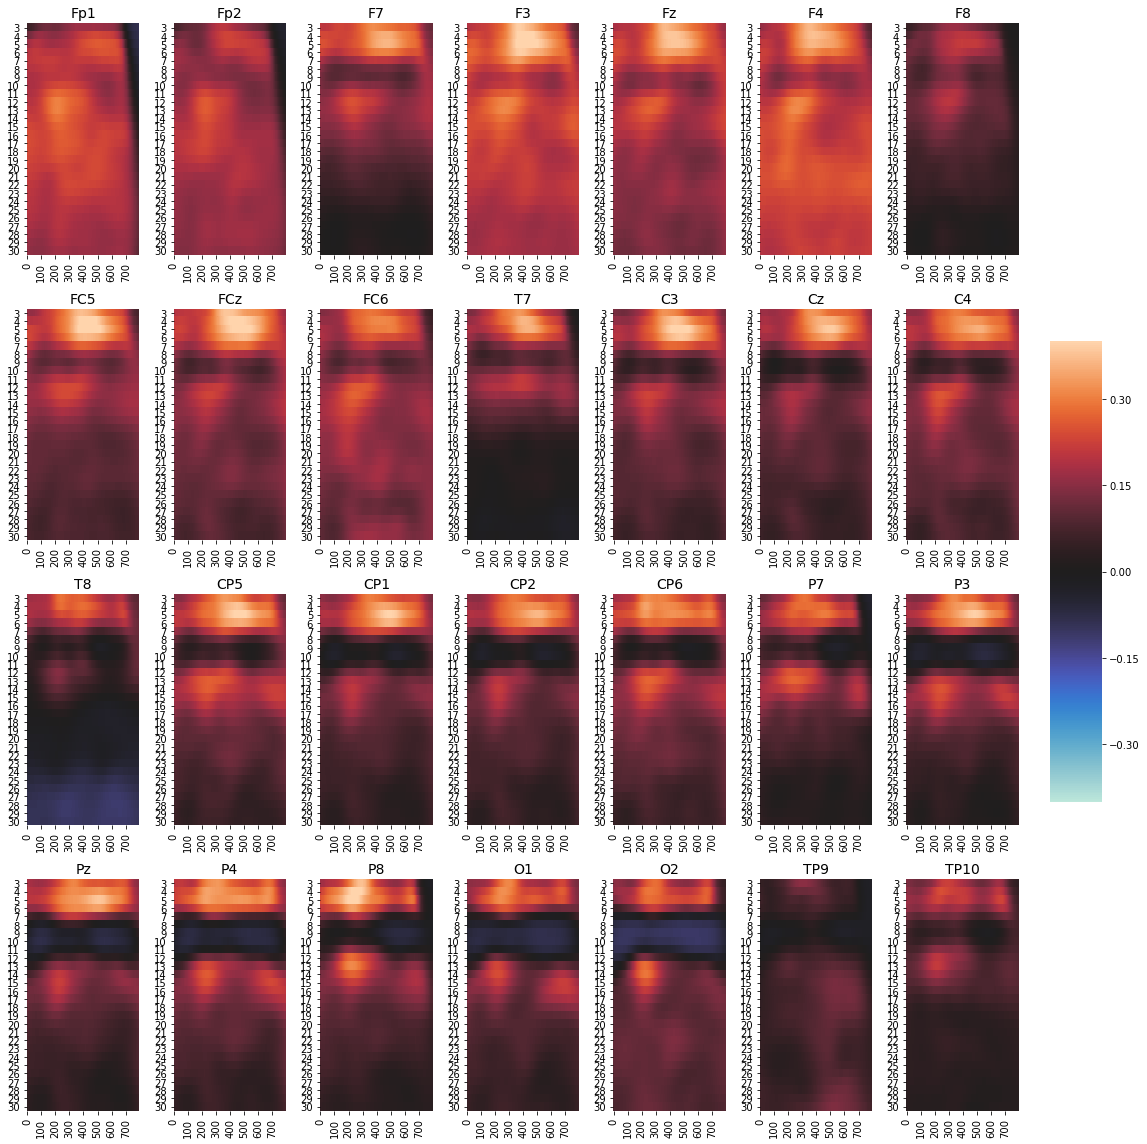

In [87]:
channelwisePlotCORR(corr_imp_pow_compact)

I:\Miniconda\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


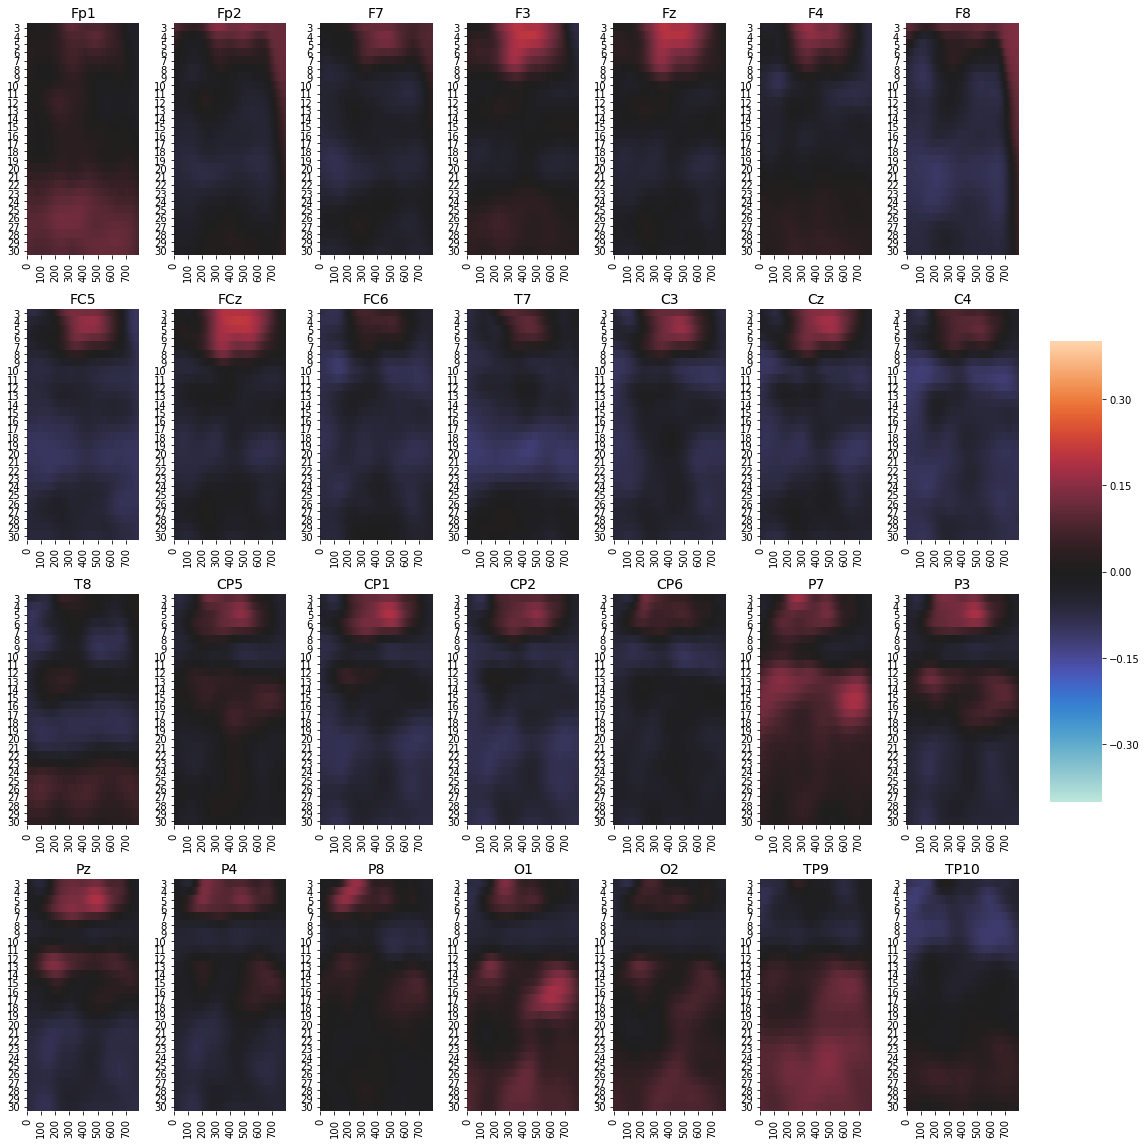

In [91]:
channelwisePlotCORR(corr_exp_pow_compact)